### Задача: 
вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:  
- В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные   
- Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый  

Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

Задания:
1. Выберите метод, который предположительно подойдет в первом вопросе.
2. Проверьте, являются ли дисперсии внутри групп гомогенными.
3. Проведите тест на нормальность распределения.
4. Сравните средние в представленных группах.
5. Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
6. Примите решение: какие картинки в итоге будем использовать?
7. Выберите метод для второго теста.
8. Визуализируйте распределение events для контрольной и тестовой групп. 
9. Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя.  
10. Выберите формулу для модели, проведите тест.  

### Решение:

1. Поскольку пользователям показывались 3 варианта фотографии, для сравнения средних в данном случае следует использовать статистический тест ANOVA.

In [123]:
import pandas as pd
import scipy as scipy
import statsmodels.stats.multicomp as ssm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns

In [86]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-na-t/Statistics/5_task_1.csv')
df

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [88]:
a = df.query("group == 'A'").events
b = df.query("group == 'B'").events
c = df.query("group == 'C'").events

2. Проверим, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена. (scipy.stats.levene либо pingouin.homoscedasticity)

In [90]:
scipy.stats.levene(a, b, c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

Вывод: p-value > 0.05, не отклоняем нулевую гипотезу.

3. Проверим, что данные распределены нормально (тест Шапиро-Уилка). Нулевая гипотеза - распределение нормально.

In [92]:
scipy.stats.normaltest(a)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [93]:
scipy.stats.normaltest(b)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [94]:
scipy.stats.normaltest(c)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

Вывод: распределение events в группе A является нормальным, распределение events в группе B является нормальным, распределение events в группе C является нормальным.

4. Сравним средние в представленных группах. Для сравнения средних используем однофакторный дисперсионный анализ.

In [96]:
scipy.stats.f_oneway(a, b, c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

Вывод: значение статистики равно 2886, а р-уровень значимости составил 0.

5. Используем критерий Тьюки чтобы определить, между какими группами есть статистически значимые различия.

In [97]:
#Из statsmodels.stats.multicomp мы берём функцию pairwise_tukeyhsd() . В качестве первого аргумента мы даём массив с зависимой переменной events , в качестве аргумента groups - массив с независимой переменной. Затем используйте метод .summary() для вывода таблицы.
#- **Как по таблице понять, где различия значимые?** Смотрим на столбец **reject**. Если там стоит True - различия значимые.
#- **Как по таблице понять характер различий в средних?**
#Столбец **meandiff** отражает различие в средних между второй и первой группой, именно в таком порядке.

In [99]:
ssm.pairwise_tukeyhsd(df.events, df.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


Вывод: статистически значимые различия существуют между группами A и В, А и С, В и С.
6. Следует использовать квадратные картинки (В).

7. Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.
Следует использовать многофакторный дисперсионный анализ, т.к. он позволяет анализировать несколько групп, если у нас есть две разбивки по группам.

In [100]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-na-t/Statistics/5_task_2.csv')
df

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


8. Визуализируем распределение events для контрольной и тестовой групп.

group
control    AxesSubplot(0.125,0.125;0.775x0.755)
test       AxesSubplot(0.125,0.125;0.775x0.755)
Name: events, dtype: object

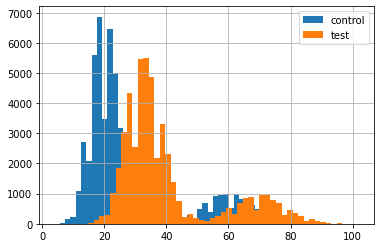

In [101]:
df.groupby('group').events.hist(legend=True, bins=50)

9. Посчитаем среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

In [103]:
#Группируем по экспериментальной группе и сегменту, берём переменную events и используем метод .describe()
df.groupby(['group', 'segment']).events.describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

10. Выберем формулу для модели, проведем тест.  
Т.к. мы хотим проверить эффект нескольких переменных – group и segment – на events, с взаимодействием факторов, выберем для модели формулу events = segment + group + segment:group.

Проведем тест через anova_lm либо pg.anova.

In [ ]:
#- **Как сделать многофакторный дисперсионный анализ?**
#Сначала мы используем функцию `smf.ols()` из `statsmodels` , где первым аргументом мы указываем формулу из прошлого задания, вторым - набор данных, а затем используем на ней метод `.fit()` .
#Результат мы даём в функцию `anova_lm` оттуда же и указываем аргумент `typ = 2`

In [122]:
sm.stats.anova_lm(smf.ols("events ~ segment + group + segment:group", df).fit(), typ = 2)

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [ ]:
#используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

In [ ]:
#В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey:

In [104]:
df['combination'] = df.group + " / "+ df.segment

In [105]:
df

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high
...,...,...,...,...,...
99995,60695,control,low,15.0,control / low
99996,5934,control,low,16.0,control / low
99997,30046,control,low,22.0,control / low
99998,26474,control,low,21.0,control / low


In [106]:
ssm.pairwise_tukeyhsd(df.events, df.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control / high,control / low,-39.9392,0.001,-40.1073,-39.7711,True
control / high,test / high,9.9677,0.001,9.7551,10.1803,True
control / high,test / low,-26.9449,0.001,-27.113,-26.7768,True
control / low,test / high,49.9069,0.001,49.7388,50.075,True
control / low,test / low,12.9944,0.001,12.888,13.1007,True
test / high,test / low,-36.9126,0.001,-37.0807,-36.7445,True


Вывод:  
    Для обоих сегментов показатели статистически значимо увеличились по сравнению с контрольной группой  
    Разница между control/high и test/high составила около 10  
    Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13

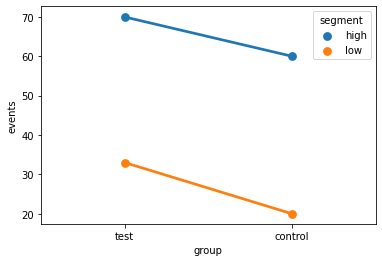

In [127]:
# Визуализируем результаты теста
sns.pointplot(x='group', y='events', data=df, hue='segment')

Вывод: фактор group оказался ЗНАЧИМЫМ, фактор segment – ЗНАЧИМЫМ, их взаимодействие – ЗНАЧИМО. 
Судя по графику, для всех групп среднее значение events УВЕЛИЧИЛОСЬ, поэтому решение: 
ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ.